# Running GUIs on Sunbird via VNC server
To the point manual: https://scw-aberystwyth.github.io/Using-VNC-and-IDL-on-SCW/03-using_VNC/index.html

A small Manual: https://portal.supercomputing.wales/wp-content/uploads/2019/08/VNC_Unix.pdf

Sunbird has a different login node for VNC session hosting called `vnc.sunbird.swansea.ac.uk`. This login node allows us to use GUIs within a GNOME desktop environment.
## SSH into VNC login node
`ssh s.1915438@vnc.sunbird.swansea.ac.uk`

You will see a message like this

```sh
(base) hell@Dell-Precision-T1600:~/.ssh$ ssh s.1915438@vnc.sunbird.swansea.ac.uk
Last login: Fri Apr  8 03:37:22 2022 from 5.151.27.170
====================== Supercomputing Wales - Sunbird ========================

   This system is for authorised users, if you do not have authorised access
        please disconnect immediately, and contact Technical Support.

 -----------------------------------------------------------------------------

            For user guides, documentation and technical support:
                  Web: http://portal.supercomputing.wales

 -------------------------- Message of the Day -------------------------------

  UPDATE: SCW SUPPORT DURING COVID-19, 18/03/2020

    Please be aware that, due to the current situation with COVID-19,
      support services are still available but may take longer to
      respond than normal.

  Please don’t hesitate to ask if we can be of assistance to you at this time.

===============================================================================

__      ___   _  _____ 
\ \    / / \ | |/ ____|
 \ \  / /|  \| | |     
  \ \/ / | .   | |     
   \  /  | |\  | |____ 
    \/   |_| \_|\_____|
vnc.sunbird.swansea.ac.uk                       
-----------------------

TigerVNC server sessions:

X DISPLAY #	PROCESS ID
Please run  vncserver  to setup the vnc server.
---------------------
[s.1915438@sl3 ~]$ 
```

## Start VNC server
`vncserver`

```sh
[s.1915438@sl3 ~]$ vncserver

New 'sl3:5 (s.1915438)' desktop is sl3:5

Starting applications specified in /home/s.1915438/.vnc/xstartup
Log file is /home/s.1915438/.vnc/sl3:5.log
```

Here choose a password for one-time, which is completely useless.

Here we have been assigned port number 5 more from the 5900. i.e. our VNC server is running on port 5900 + 5 = 5905. We just need to port forward it to our local PC.

## Check log file for errors
Occasionally, the `vncserver` might not startup due to some error. We can have a look at the log file.

Normal logfile:
```sh
[s.1915438@sl3 ~]$ cat /home/s.1915438/.vnc/sl3:5.log

Xvnc TigerVNC 1.8.0 - built Oct 10 2019 05:49:17
Copyright (C) 1999-2017 TigerVNC Team and many others (see README.txt)
See http://www.tigervnc.org for information on TigerVNC.
Underlying X server release 12004000, The X.Org Foundation


Tue Apr 12 19:11:19 2022
 vncext:      VNC extension running!
 vncext:      Listening for VNC connections on all interface(s), port 5905
 vncext:      created VNC server for screen 0
FreeType: couldn't open face /usr/share/fonts/liberation/LiberationMono-Bold.ttf: 1
Running without a11y support!
FreeType: couldn't open face /usr/share/fonts/liberation/LiberationMono-Bold.ttf: 1
Warning: Missing charsets in String to FontSet conversion
Warning: Unable to load any usable fontset
/usr/bin/xterm: cannot load font '-misc-fixed-medium-r-semicondensed--13-120-75-75-c-60-iso10646-1'
```

Errorneous log file:
```sh
[s.1915438@sl3 ~]$ cat /home/s.1915438/.vnc/sl3:5.log

Xvnc TigerVNC 1.8.0 - built Oct 10 2019 05:49:17
Copyright (C) 1999-2017 TigerVNC Team and many others (see README.txt)
See http://www.tigervnc.org for information on TigerVNC.
Underlying X server release 12004000, The X.Org Foundation


Tue Mar 22 22:52:04 2022
 vncext:      VNC extension running!
 vncext:      Listening for VNC connections on all interface(s), port 5905
 vncext:      created VNC server for screen 0
FreeType: couldn't open face /usr/share/fonts/liberation/LiberationMono-Bold.ttf: 1
FreeType: couldn't open face /usr/share/fonts/liberation/LiberationMono-Bold.ttf: 1
Warning: Missing charsets in String to FontSet conversion
Warning: Unable to load any usable fontset
Running without a11y support!
/usr/bin/xterm: cannot load font '-misc-fixed-medium-r-semicondensed--13-120-75-75-c-60-iso10646-1'
Killing Xvnc process ID 100581
XIO:  fatal IO error 2 (No such file or directory) on X server ":5"
      after 69 requests (69 known processed) with 0 events remaining.
XIO:  fatal IO error 2 (No such file or directory) on X server ":5"
      after 148 requests (148 known processed) with 4 events remaining.
Error: cannot open display: :5
```

## Error: cannot open display
Then there is a problem with the `xstartup` file found in the `.vnc` folder. 
```sh
[s.1915438@sl3 .vnc]$ cat /home/s.1915438/.vnc/xstartup
#!/bin/sh

unset SESSION_MANAGER
unset DBUS_SESSION_BUS_ADDRESS
/etc/X11/xinit/xinitrc
# Assume either Gnome or KDE will be started by default when installed
# We want to kill the session automatically in this case when user logs out. In case you modify
# /etc/X11/xinit/Xclients or ~/.Xclients yourself to achieve a different result, then you should
# be responsible to modify below code to avoid that your session will be automatically killed
if [ -e /usr/bin/gnome-session -o -e /usr/bin/startkde ]; then
    vncserver -kill $DISPLAY
fi
```

Just remove the following part where the code checks for a desktop environment.
```sh
if [ -e /usr/bin/gnome-session -o -e /usr/bin/startkde ]; then
    vncserver -kill $DISPLAY
fi
```

## Port Forwarding
As usual, the port forwarding is straightforward. 

`ssh -L <local_port>:localhost:<VNC_port> username@vnc.sunbird.swansea.ac.uk`

`ssh -L 5900:localhost:5905 s.1915438@vnc.sunbird.swansea.ac.uk`

## Setup a VNC client
You can use Remmina, VNC viewer or Tiger VNC. Download VNC Viewer here: https://www.realvnc.com/en/connect/download/viewer/. 

In the address bar type this:

`localhost:5900` i.e. the local_port that you used for forwarding.

It will ask you for confirmation that you want to use VNC server that is not encrypted.

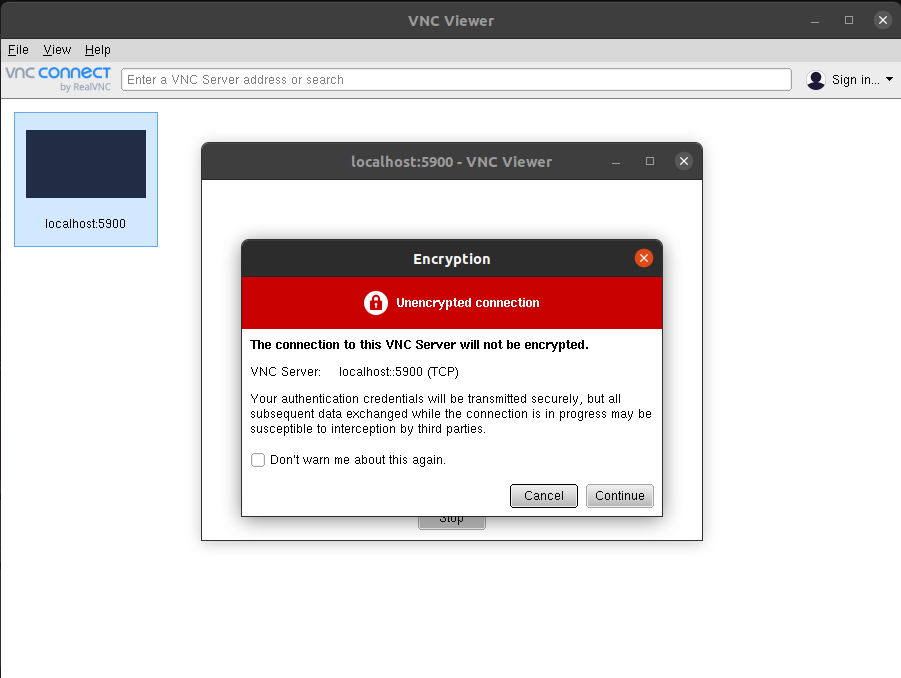

Then enter you uni password. And you end up here.

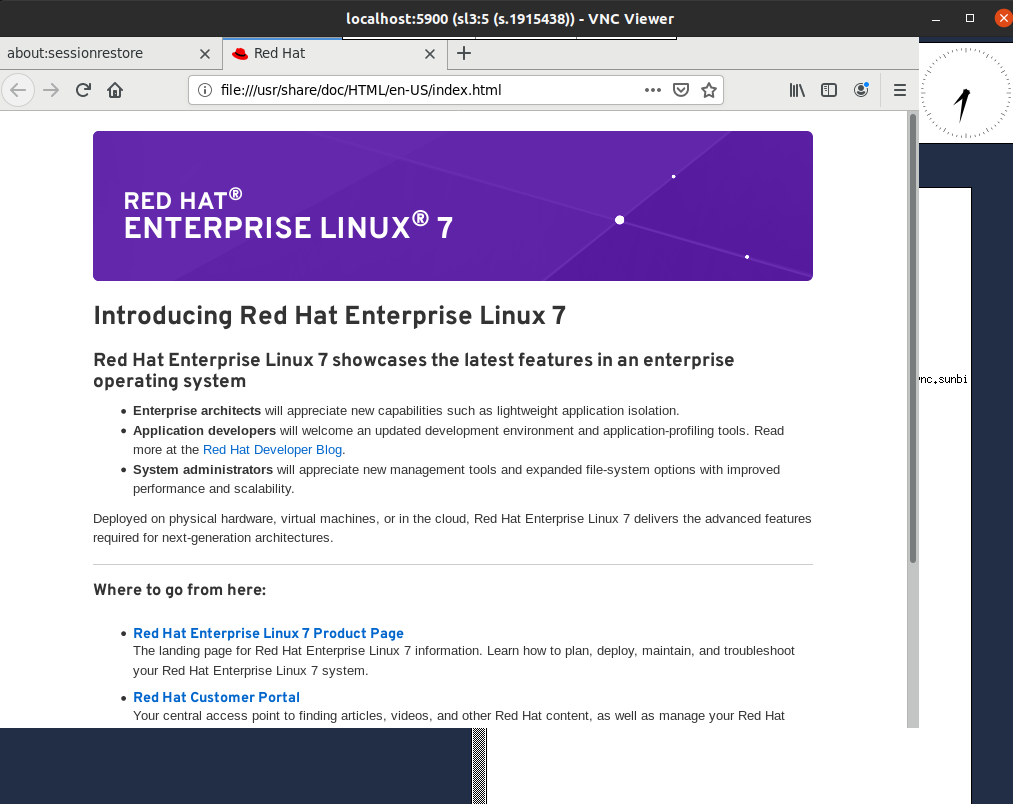

Just close all tabs of Firefox to close the software. Now you will see this

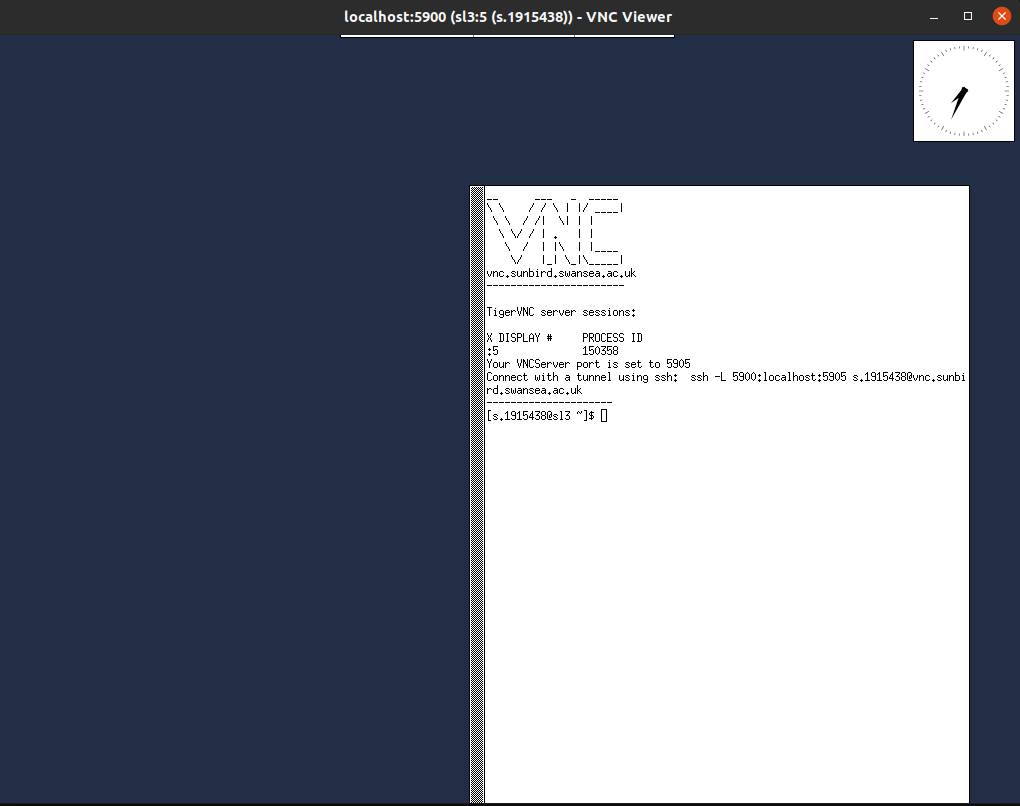

Type `gnome-session` to load the desktop environment. Click on `activities` on left top corner to see a list of all apps.

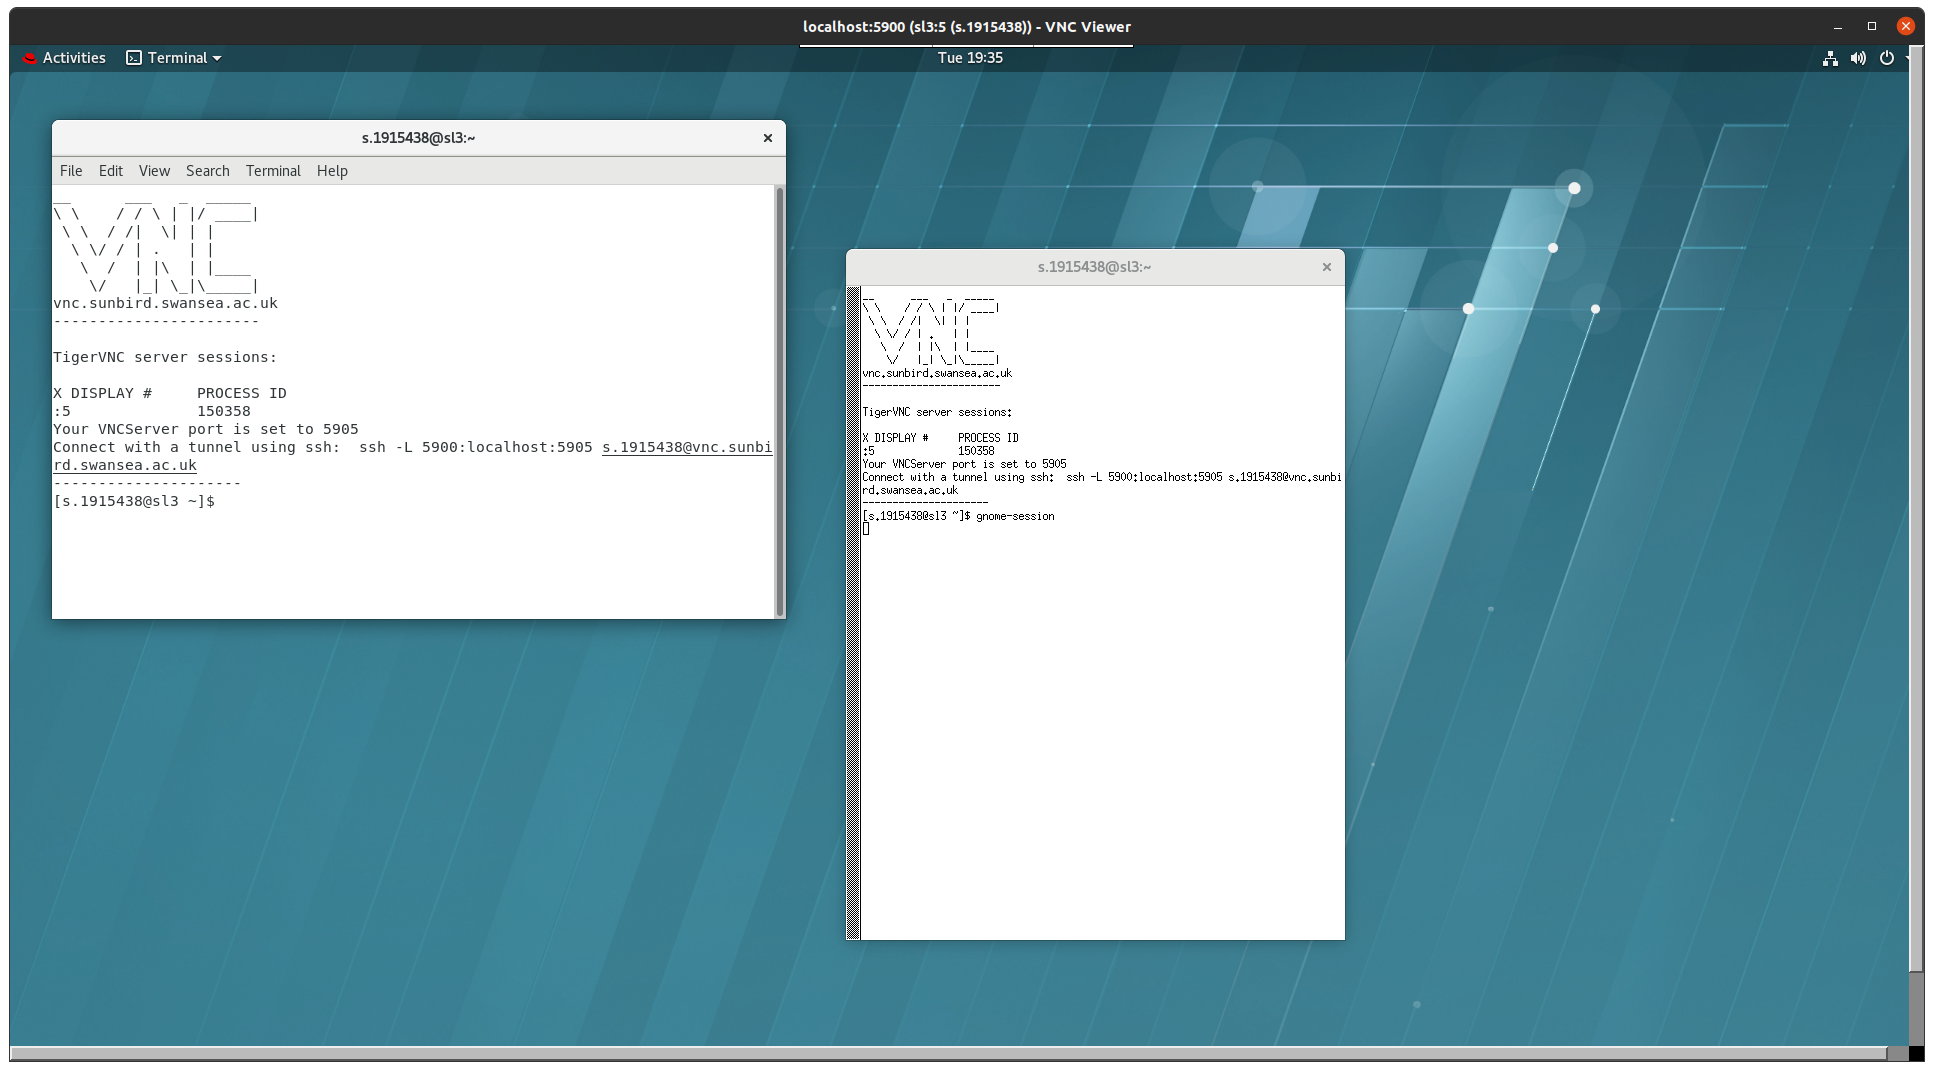

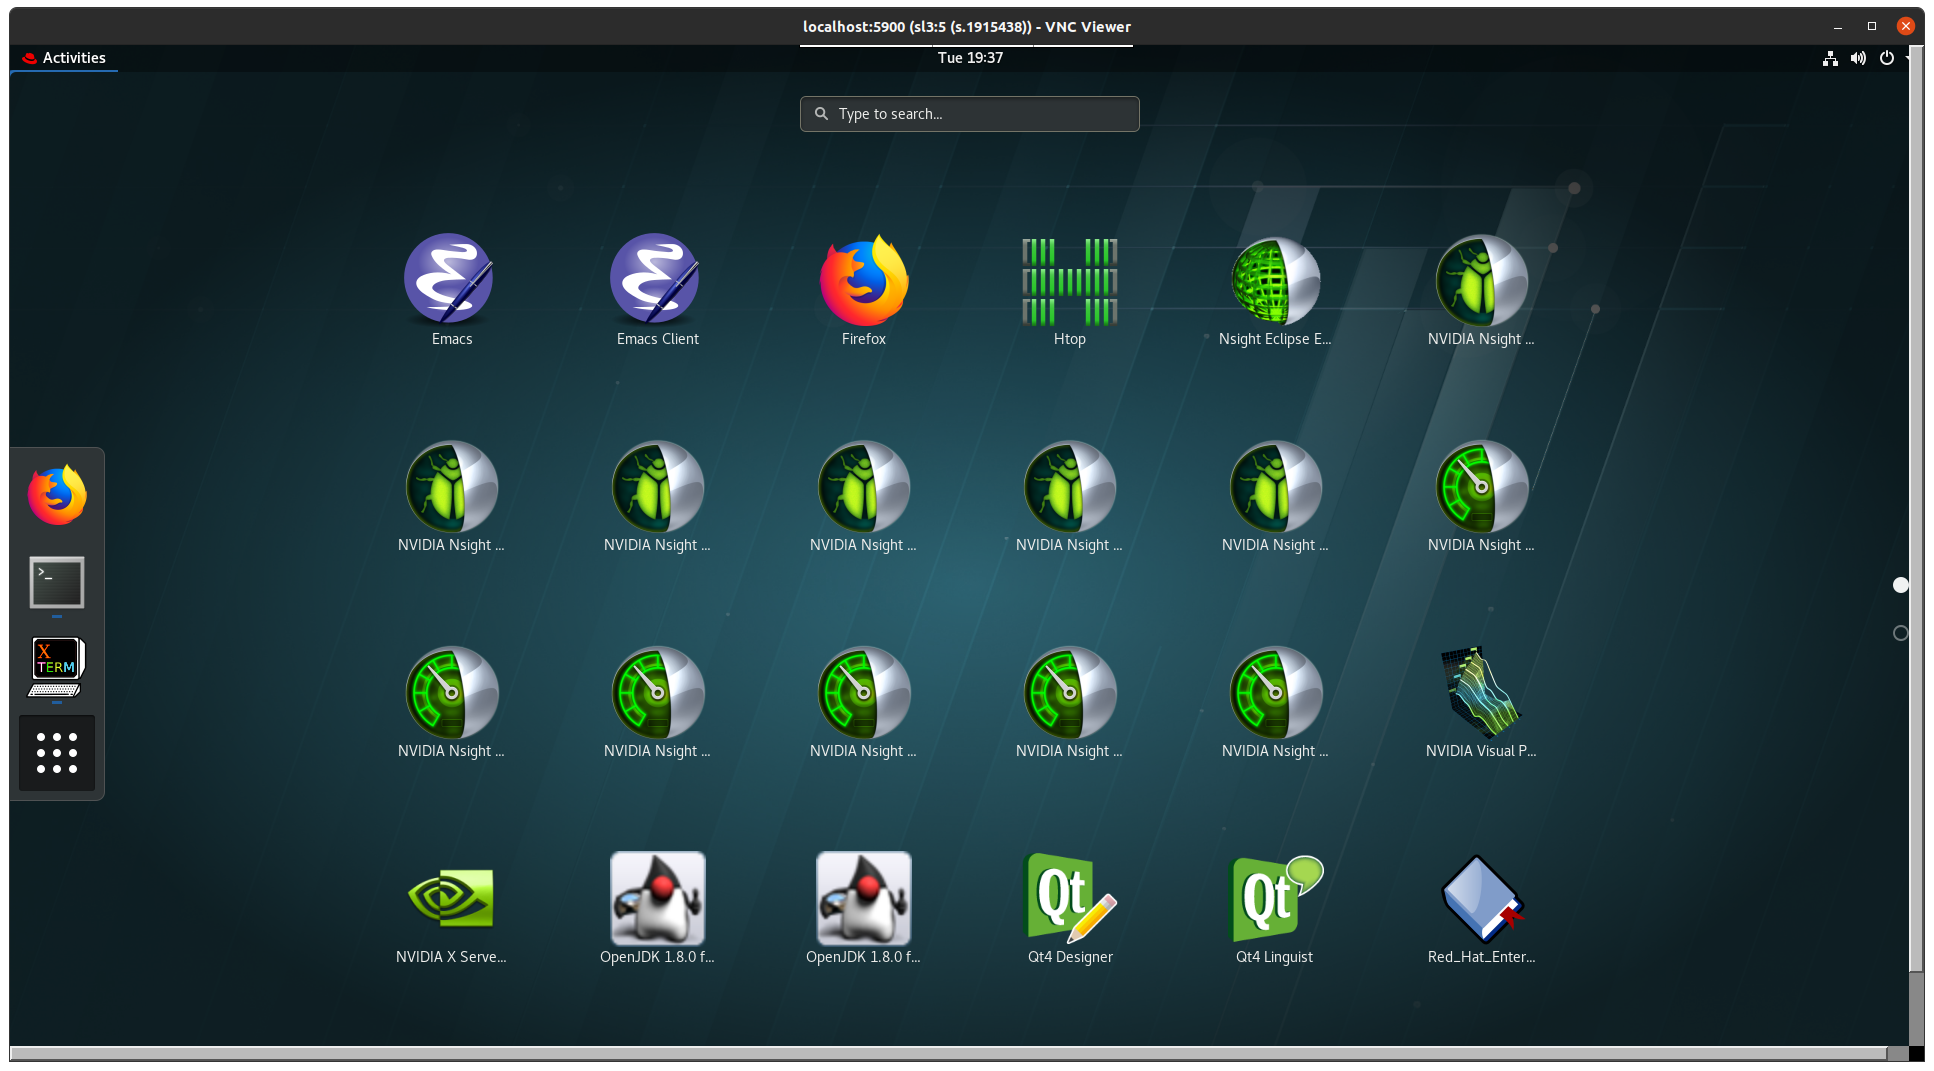

## Running an app
You should know the `.exe` file name of any software. For example, MATLAB has `matlab.exe`, Ansys has `launcher.exe`. It varies from software to software. For instance, we can run MATLAB as follows.

```sh
[s.1915438@sl3 ~]$ module load matlab/
matlab/2021a   matlab/R2019a  matlab/R2019b  
[s.1915438@sl3 ~]$ module load matlab/2021a 
[s.1915438@sl3 ~]$ matlab
MATLAB is selecting SOFTWARE OPENGL rendering.
Gtk-Message: 19:56:35.884: Failed to load module "canberra-gtk-module"
```

And here is the GUI screen.

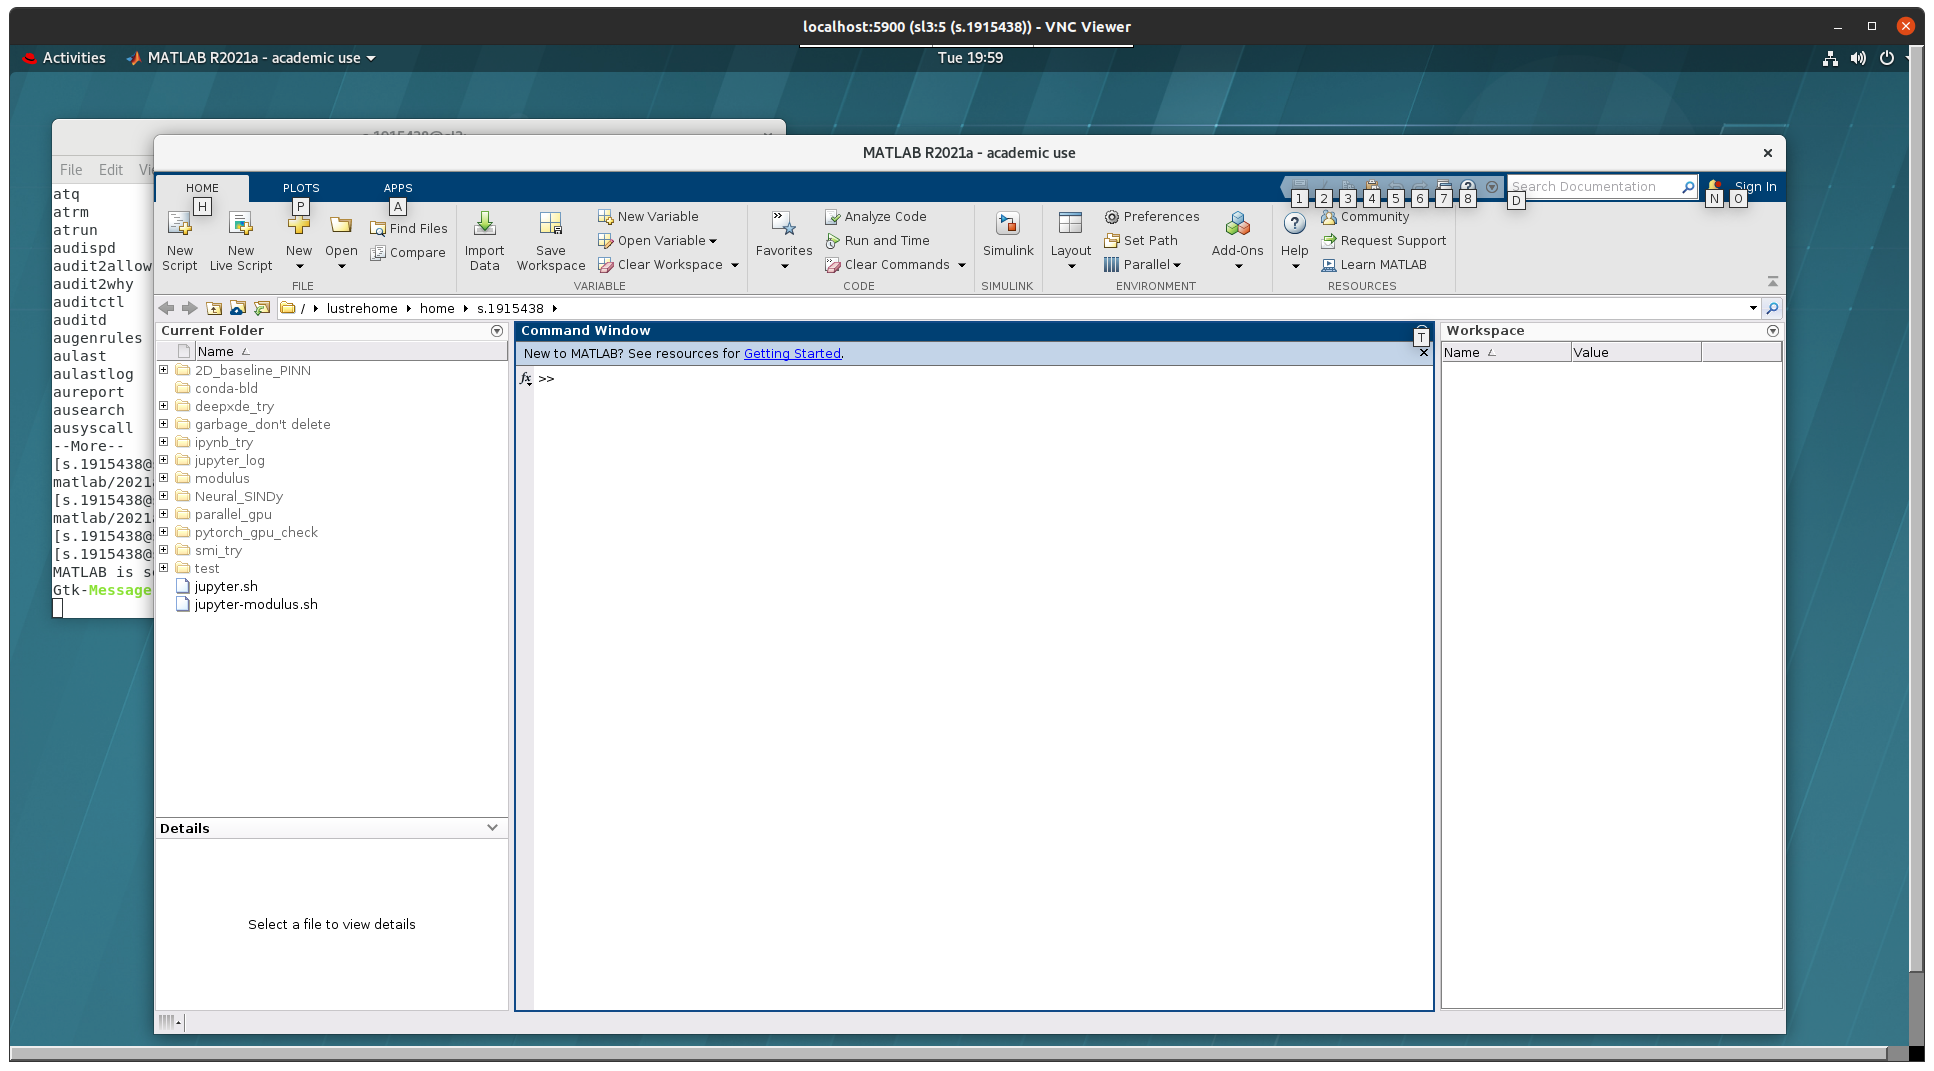

We can also check the GNOME settings.

Just right click, go to settings.

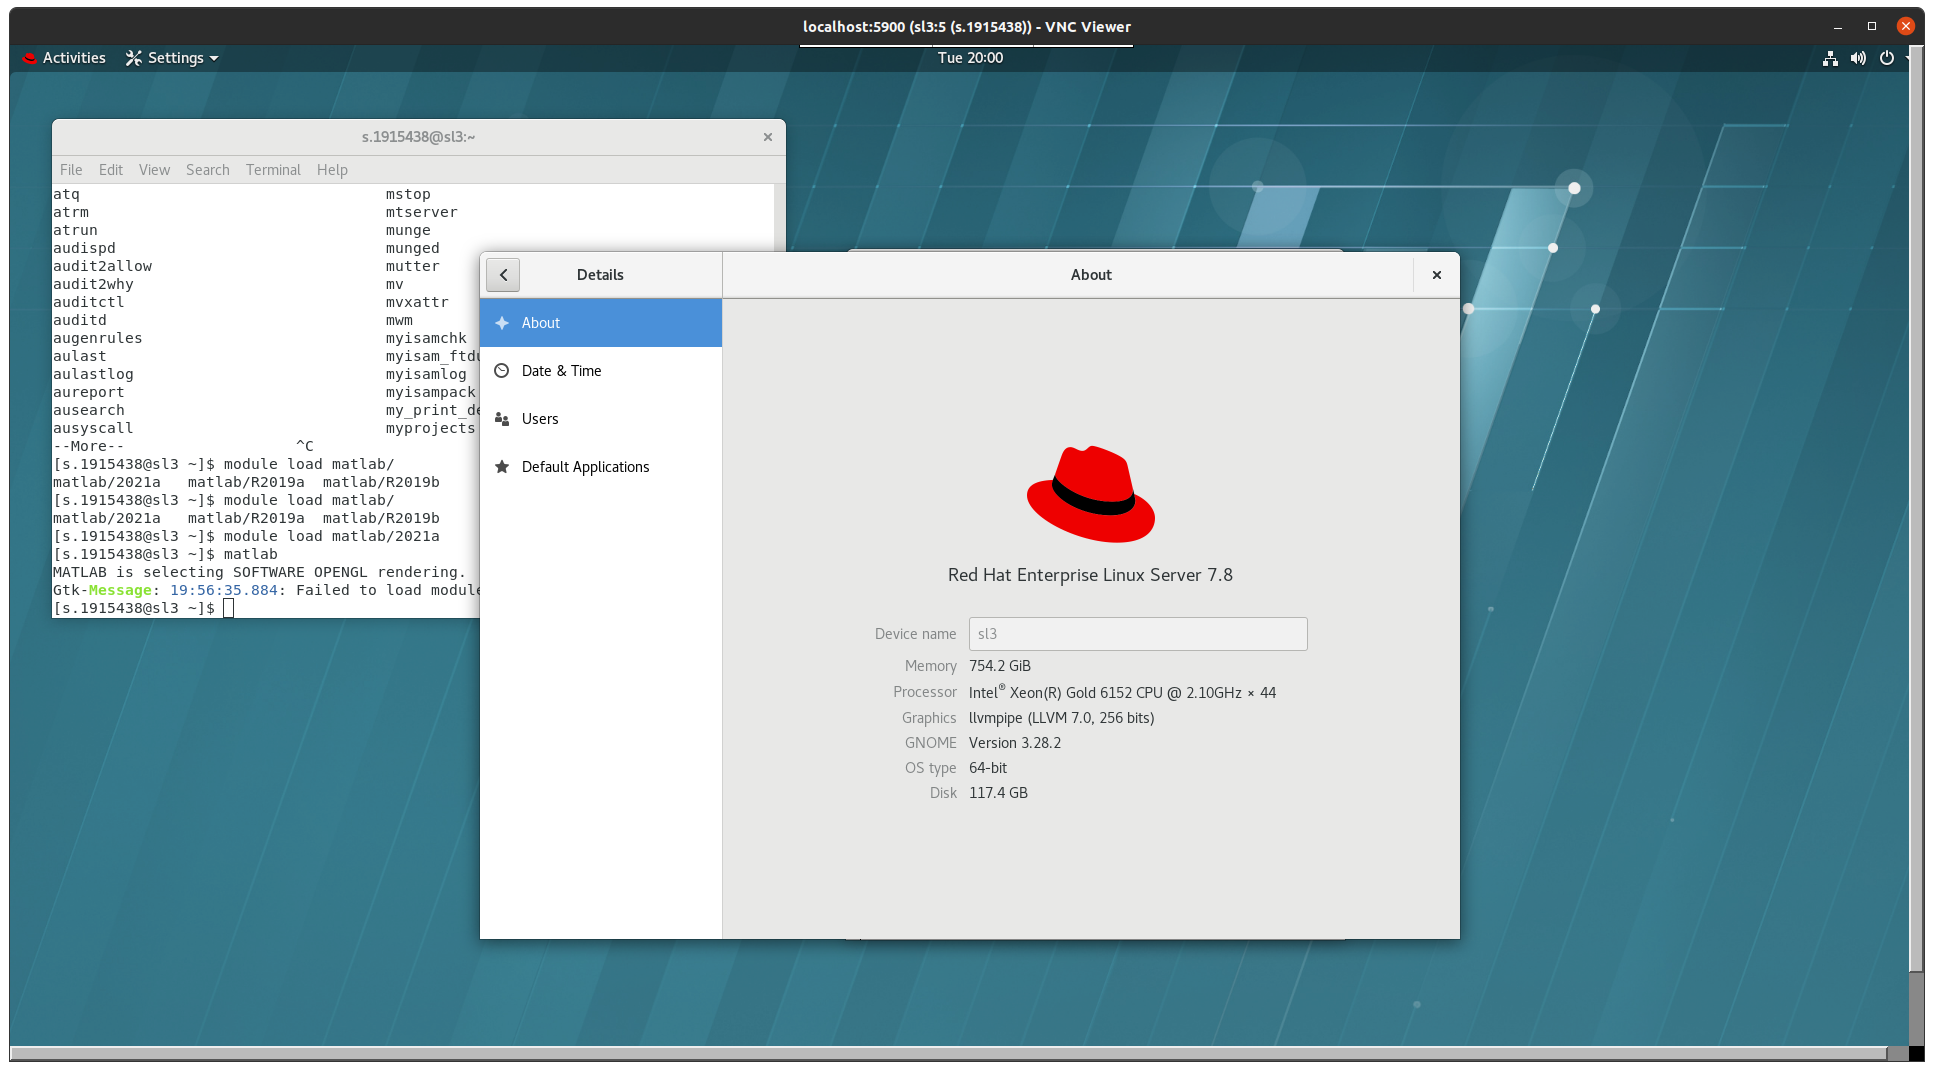

## Closing VNC server
Click X button on central top area.

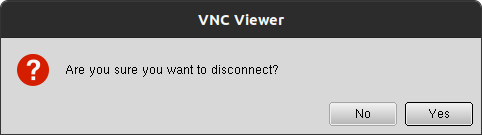

Then close the software.

OR just go to the ssh forwarding terminal and type `exit`.
```sh
[s.1915438@sl3 ~]$ exit
logout
```

## Killing VNC server on Sunbird
`vncserver -kill :5`
where 5 is the VNC server port number.
```sh
TigerVNC server sessions:

X DISPLAY #	PROCESS ID
:5		150358
Your VNCServer port is set to 5905
Connect with a tunnel using ssh:  ssh -L 5900:localhost:5905 s.1915438@vnc.sunbird.swansea.ac.uk
---------------------
[s.1915438@sl3 ~]$ vncserver -kill :5
Killing Xvnc process ID 150358
[s.1915438@sl3 ~]$ exit
```